<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**

Nama  : Muhamad Anang Abdullah Faqih

Kelas : D4 TI 3D

NIM   : 2241720070

**Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

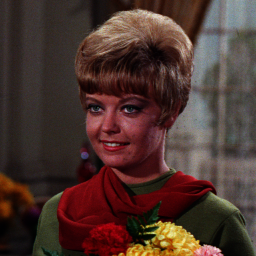

In [2]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
cv2_imshow(img)

Gamma Correction pada Citra
---------------------------
Masukkan nilai Gamma: 3


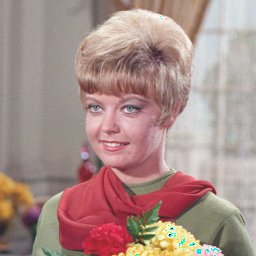

In [3]:
# fungsi Gamma Correction

def gamma_correction(img, gamma):

  normalized = img / 225.0
  corrected = np.power(normalized, 1.0 / gamma)
  return np.uint8(corrected * 255)

print('Gamma Correction pada Citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, bukan angka!')

gamma_img = gamma_correction(img, gamma)
cv2_imshow(gamma_img)

2. Buat Simulasi Image Depth

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

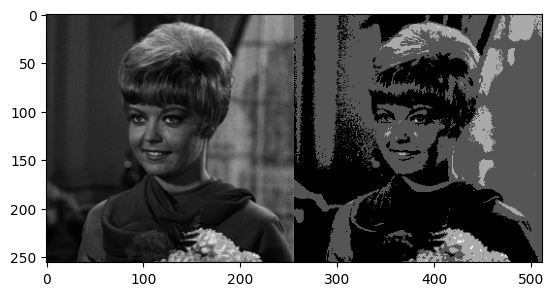

In [4]:
from matplotlib import pyplot as plt
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.round(original[y, x]/level) * level

frame = cv.hconcat([original, depth_image])
plt.imshow(frame, cmap='gray')

3. Buat modul Average Denoising

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /Images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /Images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob(import glob)

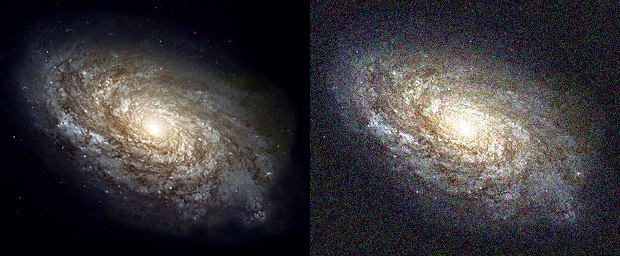

In [5]:
import glob

galaxy = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

frame = cv.hconcat([galaxy, cv_img[0]])
cv2_imshow(frame)

In [6]:
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1-img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

In [7]:
def image_averaging(list_img, total_iamge):
  avg_img = np.zeros(list_img[0].shape)
  for i in range(total_iamge):
    avg_img += list_img[i]
  avg_img /= total_iamge
  return avg_img

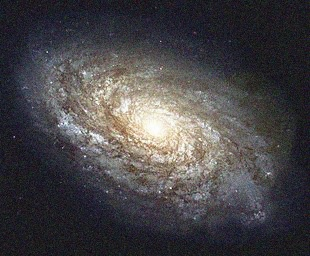

Jumlah Citra:  5
PSNR:  19.39961936777265


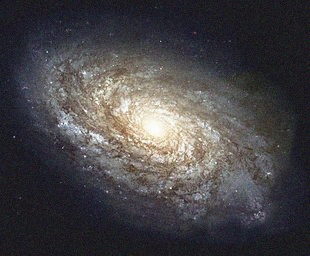

Jumlah Citra:  10
PSNR:  19.58762221321291


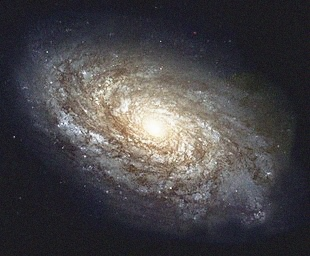

Jumlah Citra:  20
PSNR:  19.680491631012988


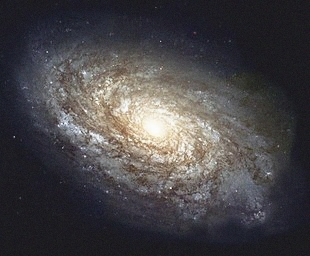

Jumlah Citra:  40
PSNR:  19.732323877035487


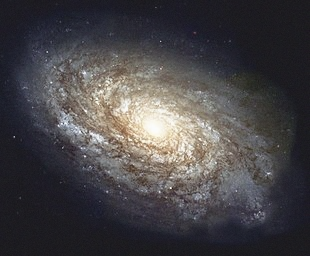

Jumlah Citra:  80
PSNR:  19.75411627935302


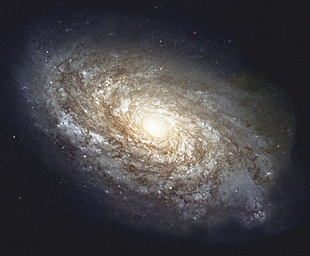

Jumlah Citra:  100
PSNR:  19.758317288501708


In [8]:
totalcitra = np.array([5,10,20,40,80,100])

list_denoised_image = []
for i in totalcitra:
  denoised_image = image_averaging(cv_img, i)
  list_denoised_image.append(denoised_image)
  cv2_imshow(denoised_image)
  print('Jumlah Citra: ', i)
  print('PSNR: ', PSNR(galaxy, denoised_image))

4. Buat Image masking untuk image berikut. iamge kiri adalah image asli(image KTP), sedangkan iamge paling kanan adalah hasilnya:

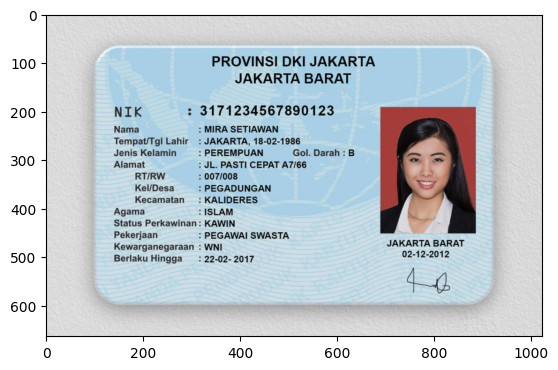

In [10]:
ktp = cv.imread('/content/drive/MyDrive/ktp.jpg')
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

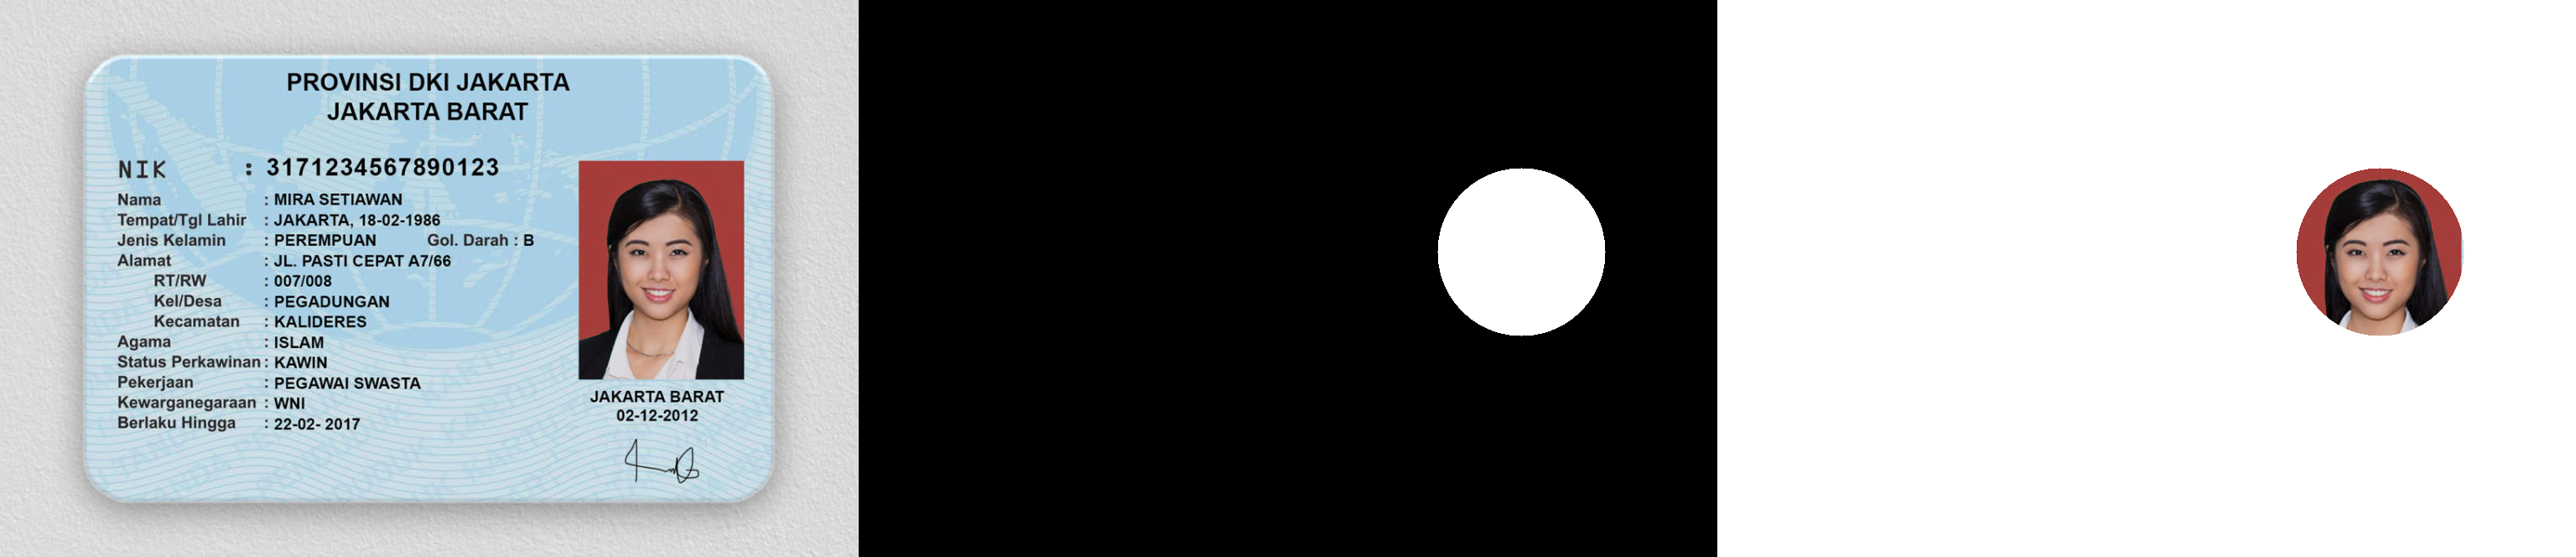

In [13]:
circle_mask = np.zeros(ktp.shape[:2], dtype='uint8')

cv.circle(circle_mask, (790,300), 100, 255, -1)

# inverse mask
inverse_mask = cv.bitwise_not(circle_mask)

# gambar putih
white_bg = np.ones_like(ktp) * 255

# circle mask ktp
ktp_mask = cv.bitwise_and(ktp, ktp, mask=circle_mask)

# black mask ktp
white_part = cv.bitwise_and(white_bg, white_bg, mask=inverse_mask)


final_result = cv.add(ktp_mask, white_part)

frame = cv.hconcat([ktp,cv.cvtColor(circle_mask, cv.COLOR_GRAY2BGR),final_result])
cv2_imshow(frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

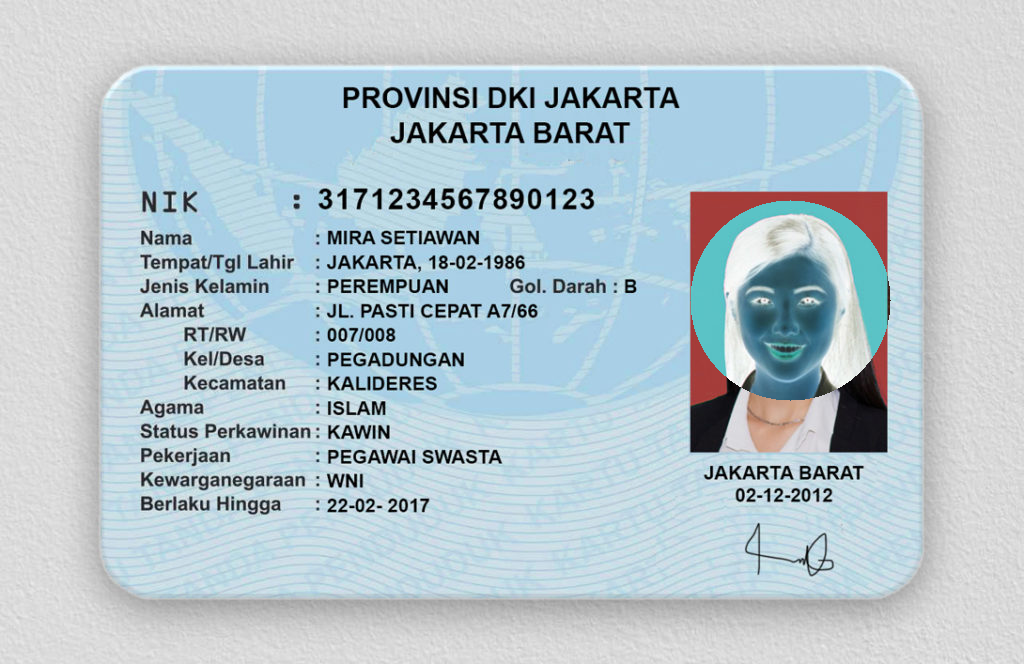

In [14]:
# menggunakan NOT
ktp2 = cv.bitwise_not(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp2)

bitwise_not akan membalikkan setiap nilai piksel pada citra ktp. Warna-warna yang cerah akan menjadi gelap, dan sebaliknya. Ini akan memberikan efek inversi warna secara keseluruhan pada citra.

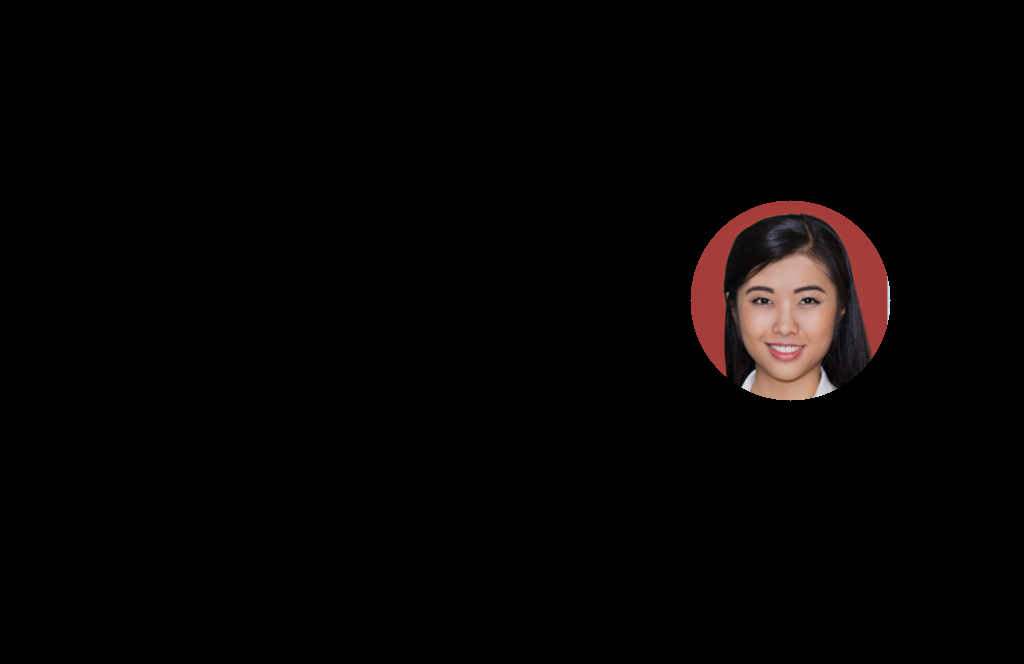

In [16]:
# menggunakan OR

ktp3 = cv.bitwise_or(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp3)

Dengan menggunakan bitwise_or, akan menghasilkan citra di mana area dalam lingkaran menampilkan bagian citra ktp, sementara area luar lingkaran berwarna hitam.

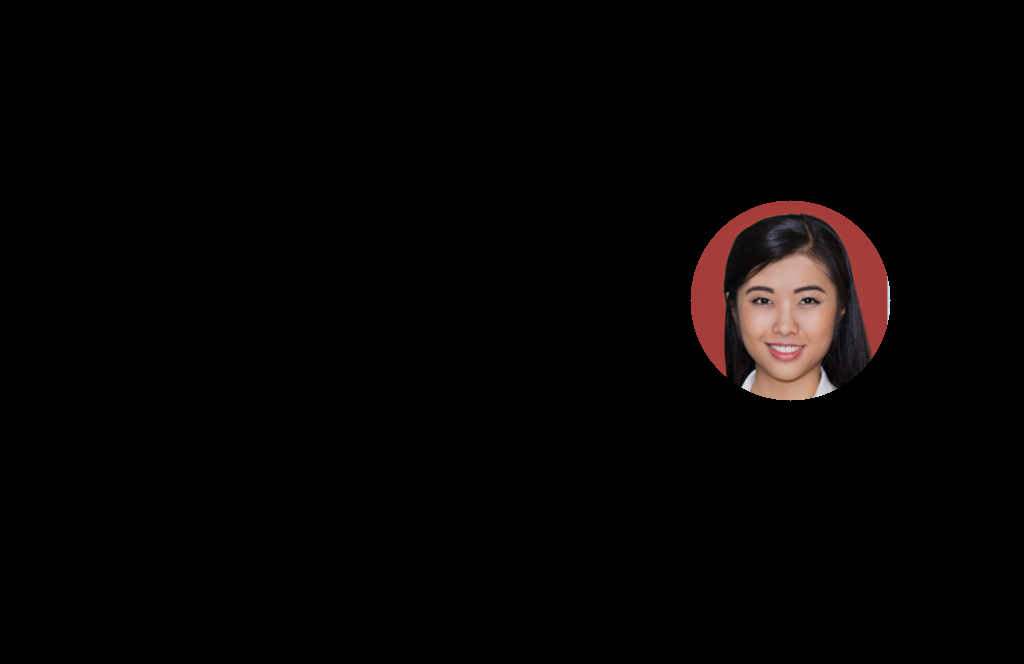

In [17]:
# menggunakan AND
ktp4 = cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp4)

bitwise_and menampilkan citra ktp hanya pada area lingkaran yang didefinisikan oleh circle_mask. Bagian luar lingkaran akan berwarna hitam, sesuai dengan mask yang digunakan.

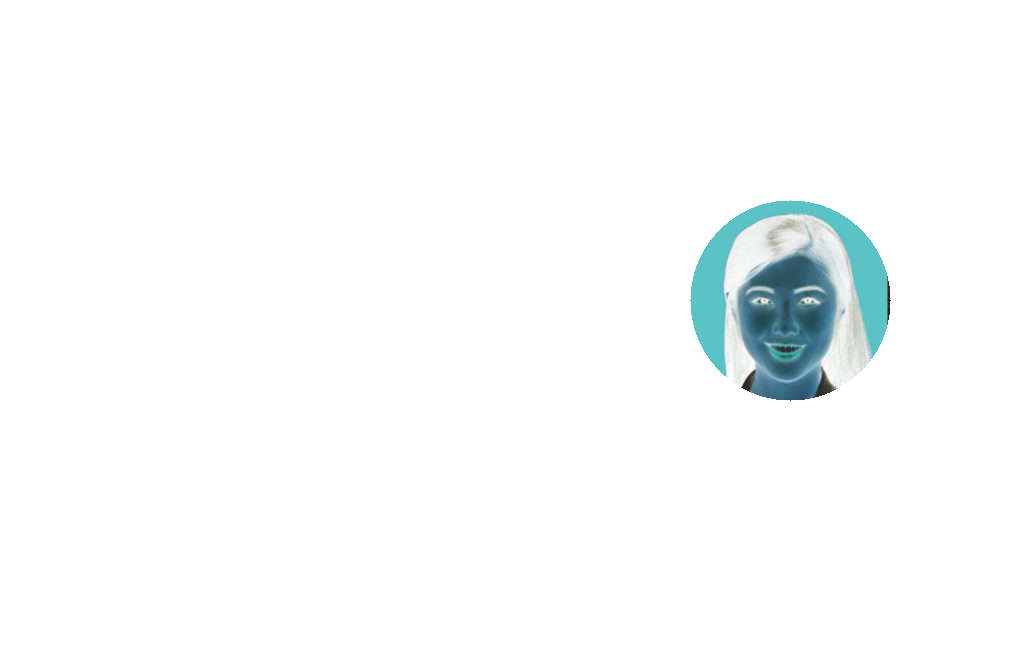

In [18]:
# menggunakan NAND
ktp5 = cv.bitwise_not(cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask))
cv2_imshow(ktp5)

bitwise_nand menghasilkan citra yang merupakan inversi dari bitwise_and. Artinya, bagian lingkaran akan memiliki warna yang terbalik dari citra ktp, sementara bagian luar lingkaran berwarna putih.

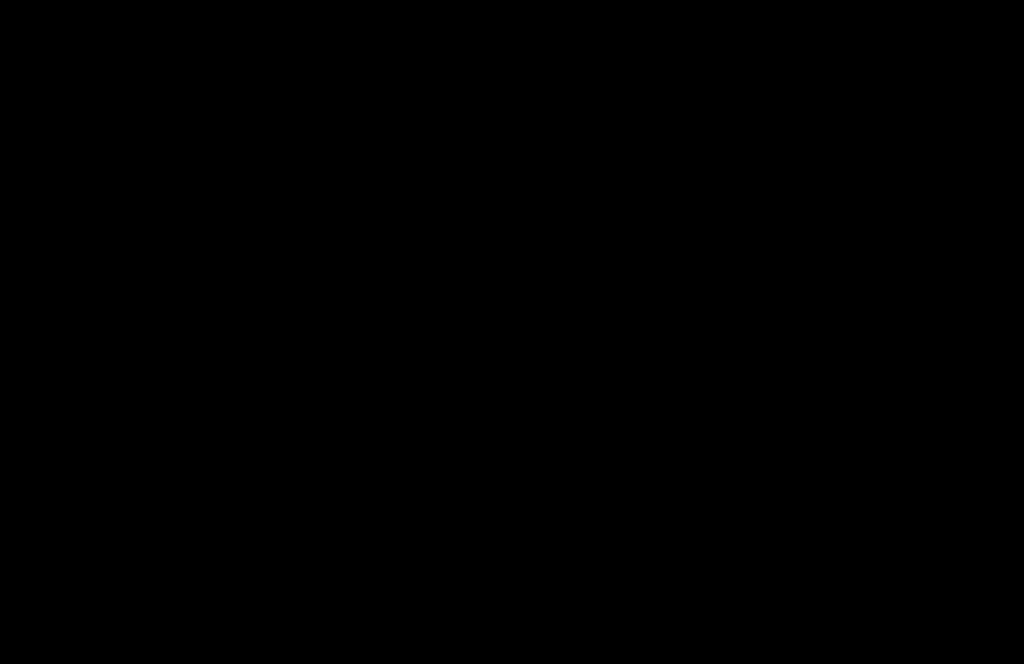

In [19]:
# menggunakan XOR
ktp6 = cv.bitwise_xor(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp6)

bitwise_xor menghasilkan citra yang memiliki bagian luar lingkaran dengan warna yang bervariasi dan bagian dalam lingkaran berwarna hitam. Ini terjadi karena XOR menghasilkan nilai yang berbeda hanya ketika salah satu dari dua citra input memiliki nilai bukan nol di lokasi tersebut. Bagian dalam lingkaran tidak memiliki tumpang tindih yang sama antara ktp_mask dan white_part, sehingga area ini menjadi hitam.